In [2]:
# 사용할 패키지 불러오기
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


먼저 자료에 대해 시간에 따른 분석을 적용하기 위해서는 unique한 영상에 대해서 다루는 게 아니라 수정되지 않은 자료로 분석을 진행해야 할 것 같아 데이터는 하나만 사용했습니다.

In [4]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/김지희/DSL/dataset/youtube_nodouble.csv", lineterminator='\n')
df_uni = pd.read_csv("C:/Users/김지희/DSL/dataset/youtube_nodouble_unique.csv", lineterminator='\n')

In [5]:
# 데이터 관찰하기
df.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,Entertainment,2
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,False,False,NaN,People & Blogs,27
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13


In [6]:
# 데이터셋에 날짜가 object 형태로 나와있어서 다시 datetime 형태로 변형
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%d %H:%M:%S')
df_uni['publishedAt'] = pd.to_datetime(df_uni['publishedAt'], format='%Y-%m-%d %H:%M:%S')


df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d 00:00:00')
df_uni['trending_date'] = pd.to_datetime(df_uni['trending_date'], format='%Y-%m-%d 00:00:00')


In [7]:
# datetime의 경우 weekday라는 method를 제공해서 요일을 반환해줌
df['trending_date'][2].weekday()

2

In [8]:
# 요일로 변경한 열 생성
df['trend_day'] = df['trending_date'].dt.day_name()
df['trend_day'] = df['trend_day'].astype('category')

In [9]:
df['trend_day']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
133536       Monday
133537       Monday
133538       Monday
133539       Monday
133540       Monday
Name: trend_day, Length: 133541, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [10]:
# 월로 변경한 열 생성
df['trend_mon'] = df['trending_date'].dt.month
df['trend_mon'] = df['trend_mon'].astype('category')

In [11]:
df.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num,trend_day,trend_mon
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12,보겸|bokyem,5947503,53326,105756,139946,False,False,NaN,Entertainment,2,Wednesday,8
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6,Wednesday,8
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,False,False,NaN,People & Blogs,27,Wednesday,8
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12,Wednesday,8
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13,Wednesday,8


In [12]:
print('요일 평균 카테고리별 트렌딩 영상 수: ', end='')
print(df.query('trending_date.dt.dayofweek in [0,1,2,3,4,5,6]')['category_name'].value_counts().sum(),"개")
mean_count = df.query('trending_date.dt.dayofweek in [0,1,2,3,4,5,6]')['category_name'].value_counts()
print(mean_count)

print('-'*30)
print("월요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 0')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 0')['category_name'].value_counts()-mean_count))

print('-'*30)
print("화요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 1')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 1')['category_name'].value_counts()-mean_count))

print('-'*30)
print("수요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 2')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 2')['category_name'].value_counts()-mean_count))

print('-'*30)
print("목요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 3')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 3')['category_name'].value_counts()-mean_count))

print('-'*30)
print("금요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 4')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 4')['category_name'].value_counts()-mean_count))

print('-'*30)
print("토요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 5')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 5')['category_name'].value_counts()-mean_count))

print('-'*30)
print("일요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 6')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 6')['category_name'].value_counts()-mean_count))


# 미세한 영상의 개수차이만 존재할 뿐 trending된 영상의 카테고리별 순위에 대해서는 전체적으로 유의미한 차이를 보이지는 않음

요일 평균 카테고리별 트렌딩 영상 수: 133541 개
Entertainment            46446
People & Blogs           21108
Music                    14328
Sports                   10279
Comedy                    8391
News & Politics           6572
Howto & Style             5819
Gaming                    4948
Film & Animation          4368
Pets & Animals            2648
Education                 2572
Science & Technology      2226
Travel & Events           1950
Autos & Vehicles          1648
Nonprofits & Activism      238
Name: category_name, dtype: int64
------------------------------
월요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): 19389 개
Autos & Vehicles         -1423
Comedy                   -7158
Education                -2188
Entertainment           -39641
Film & Animation         -3718
Gaming                   -4235
Howto & Style            -4996
Music                   -12316
News & Politics          -5646
Nonprofits & Activism     -211
People & Blogs          -18032
Pets & Animals           -2265
Science & Technology     -19

In [13]:
print('요일 평균 카테고리별 트렌딩 영상 수: ', end='')
print(df.query('trending_date.dt.dayofweek in [0,1,2,3,4,5,6]')['category_name'].value_counts().sum(),"개")
mean_count = df.query('trending_date.dt.dayofweek in [0,1,2,3,4,5,6]')['category_name'].value_counts(normalize=True)
print(mean_count)

print('-'*30)
print("월요일 카테고리별 트렌딩 영상 수 차이(평균과 비교: ", end='')
print(df.query('trending_date.dt.dayofweek == 0')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 0')['category_name'].value_counts(normalize=True)-mean_count)>0)

print('-'*30)
print("화요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 1')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 1')['category_name'].value_counts(normalize=True)-mean_count)>0)

print('-'*30)
print("수요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 2')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 2')['category_name'].value_counts(normalize=True)-mean_count)>0)

print('-'*30)
print("목요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 3')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 3')['category_name'].value_counts(normalize=True)-mean_count)>0)

print('-'*30)
print("금요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 4')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 4')['category_name'].value_counts(normalize=True)-mean_count)>0)

print('-'*30)
print("토요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 5')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 5')['category_name'].value_counts(normalize=True)-mean_count)>0)

print('-'*30)
print("일요일 카테고리별 트렌딩 영상 수 차이(평균과 비교): ", end='')
print(df.query('trending_date.dt.dayofweek == 6')['category_name'].value_counts().sum(),"개")
print((df.query('trending_date.dt.dayofweek == 6')['category_name'].value_counts(normalize=True)-mean_count)>0)


print(df[['category_name','trend_day']].value_counts())
# 미세한 영상의 개수차이만 존재할 뿐 trending된 영상의 카테고리별 순위에 대해서는 전체적으로 유의미한 차이를 보이지는 않음

요일 평균 카테고리별 트렌딩 영상 수: 133541 개
Entertainment            0.347803
People & Blogs           0.158064
Music                    0.107293
Sports                   0.076973
Comedy                   0.062835
News & Politics          0.049213
Howto & Style            0.043575
Gaming                   0.037052
Film & Animation         0.032709
Pets & Animals           0.019829
Education                0.019260
Science & Technology     0.016669
Travel & Events          0.014602
Autos & Vehicles         0.012341
Nonprofits & Activism    0.001782
Name: category_name, dtype: float64
------------------------------
월요일 카테고리별 트렌딩 영상 수 차이(평균과 비교: 19389 개
Autos & Vehicles         False
Comedy                    True
Education                 True
Entertainment             True
Film & Animation          True
Gaming                   False
Howto & Style            False
Music                    False
News & Politics          False
Nonprofits & Activism    False
People & Blogs            True
Pets & Animal

### 그래프로 표현하기

In [14]:
prob_count = df.query('trending_date.dt.dayofweek in [0,1,2,3,4,5,6]')['category_name'].value_counts(normalize=True)

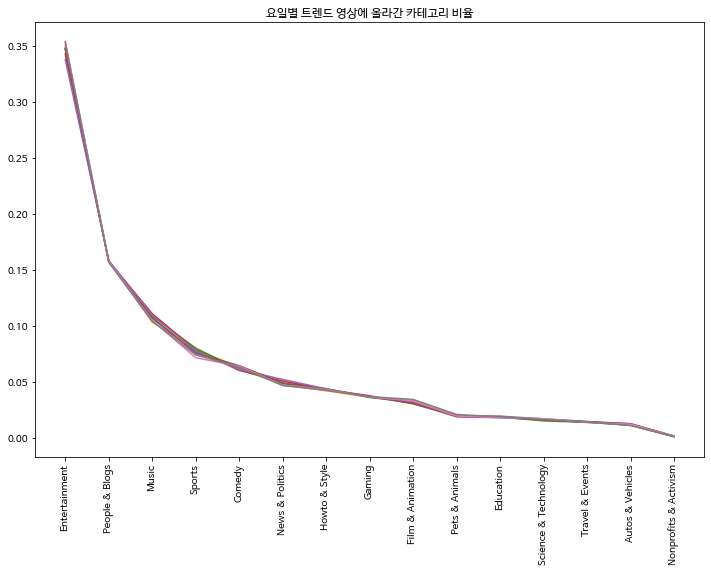

In [15]:

plt.figure(figsize = (12, 8))
plt.plot(prob_count.index,prob_count)
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 0')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 1')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 2')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 3')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 4')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 5')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.dayofweek == 6')['category_name'].value_counts(normalize=True))
plt.xticks(prob_count.index, rotation = 90, fontsize = 10) 
plt.title('요일별 트렌드 영상에 올라간 카테고리 비율')
plt.show()


In [88]:
days = df[['trend_day', 'category_name', 'video_id']].groupby(['trend_day','category_name']).count()
print(days)

                                video_id
trend_day category_name                 
Friday    Autos & Vehicles           246
          Comedy                    1243
          Education                  353
          Entertainment             6673
          Film & Animation           600
...                                  ...
Wednesday People & Blogs            2997
          Pets & Animals             363
          Science & Technology       310
          Sports                    1495
          Travel & Events            274

[105 rows x 1 columns]


In [90]:
days = days.reset_index()

In [99]:
days

,trend_day,category_name,video_id
0,Friday,Autos & Vehicles,246
1,Friday,Comedy,1243
2,Friday,Education,353
3,Friday,Entertainment,6673
4,Friday,Film & Animation,600
...,...,...,...
100,Wednesday,People & Blogs,2997
101,Wednesday,Pets & Animals,363
102,Wednesday,Science & Technology,310
103,Wednesday,Sports,1495


In [103]:
plt.figure(figsize=(12,8))
sns.countplot(days[['category_name','video_id'][days['trend_day']=='Friday'])

SyntaxError: invalid syntax (1423422587.py, line 2)

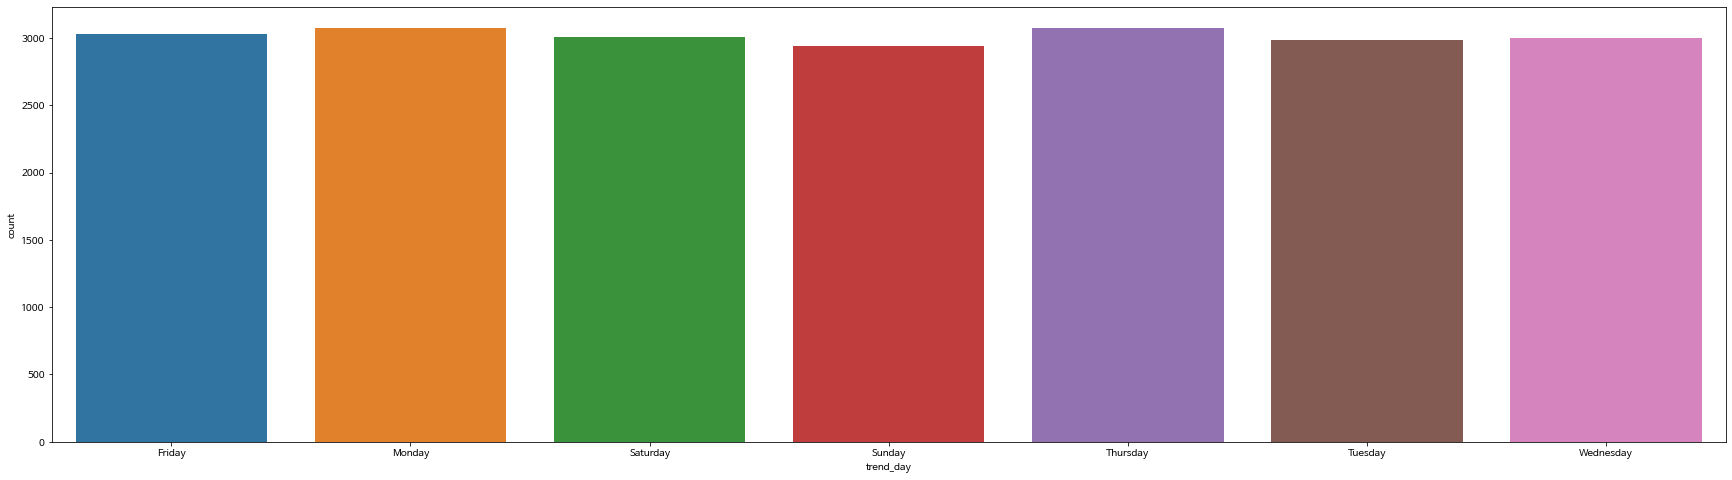

In [109]:
plt.figure(figsize=(30,8))
sns.countplot(data = df[['trend_day','category_name']][df['category_name']==''], x = 'trend_day', )
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


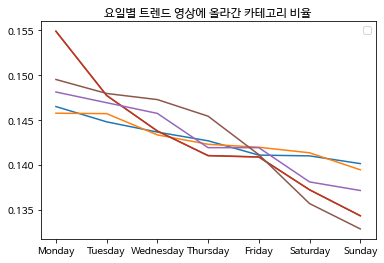

In [67]:
# x축을 요일로, 각 선들을 카테고리로 만들어보자
# plt.plot(prob_count.index,prob_count)
# plt.plot(prob_count.index,df.query('category_name')['trend_day'].value_counts(normalize=True))
days_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
plt.plot(days_index,df.query('category_name == "Entertainment"')['trend_day'].value_counts(normalize=True))
plt.plot(days_index,df.query('category_name == "People & Blogs"')['trend_day'].value_counts(normalize=True))
plt.plot(days_index,df.query('category_name == "News & Politics"')['trend_day'].value_counts(normalize=True))
plt.plot(days_index,df.query('category_name == "News & Politics"')['trend_day'].value_counts(normalize=True))
plt.plot(days_index,df.query('category_name == "Comedy"')['trend_day'].value_counts(normalize=True))
plt.plot(days_index,df.query('category_name == "Sports"')['trend_day'].value_counts(normalize=True))
plt.legend()
# plt.xticks(prob_count.index, rotation = 90, fontsize = 10) 
plt.title('요일별 트렌드 영상에 올라간 카테고리 비율')
plt.show()


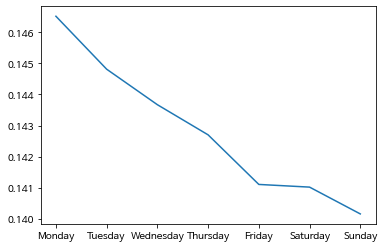

In [110]:
plt.plot(days_index,df.query('category_name == "Entertainment"')['trend_day'].value_counts(normalize=True))


In [60]:

df['category_name'].unique()

array(['Entertainment', 'Film & Animation', 'People & Blogs', 'Music',
       'Comedy', 'Education', 'News & Politics', 'Sports',
       'Nonprofits & Activism', 'Gaming', 'Travel & Events',
       'Pets & Animals', 'Science & Technology', 'Howto & Style',
       'Autos & Vehicles'], dtype=object)

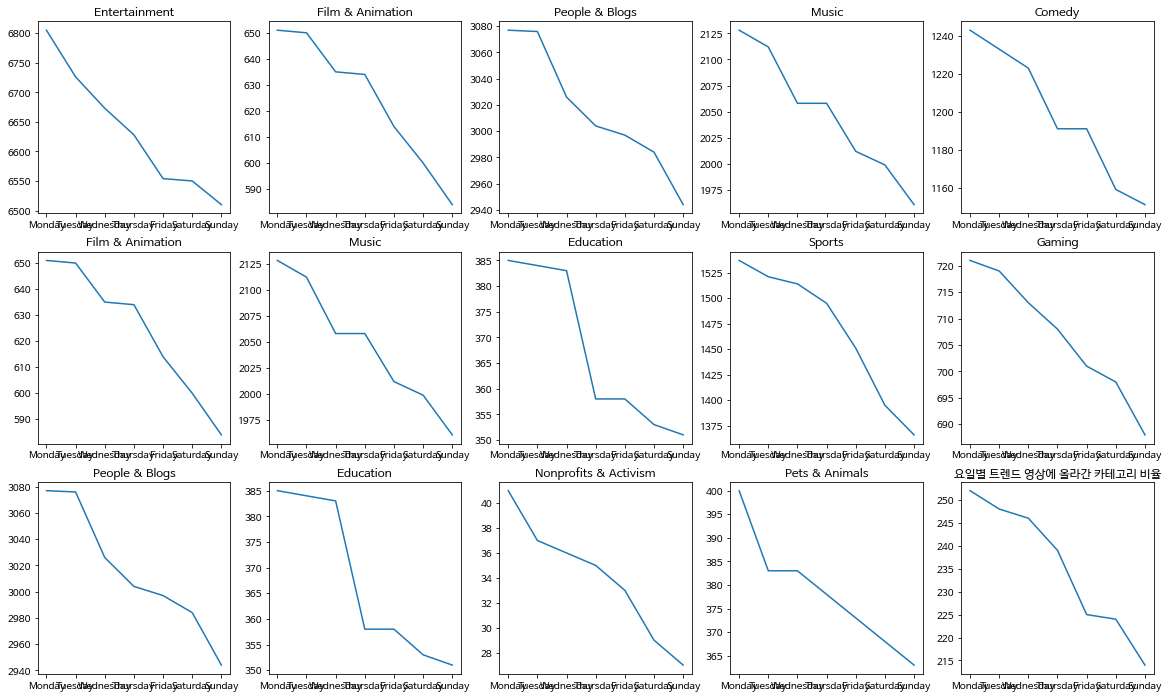

In [71]:
# x축을 요일로, 각 선들을 카테고리로 만들어보자
fig, axes = plt.subplots(3, 5, figsize = (20, 12))
days_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
for i in range(3):
    for j in range(5):
        axes[i,j].plot(days_index,df.query('category_name == "'+ df['category_name'].unique()[(i+1)*(j+1)-1]+'"')['trend_day'].value_counts(normalize = True))
        axes[i,j].set_title(df['category_name'].unique()[(i+1)*(j+1)-1])
plt.title('요일별 트렌드 영상에 올라간 카테고리 비율')
plt.show()


In [57]:
# glxmaoq rmflrl
df_new = df[['trend_day', 'category_name','view_count']].groupby(by=['trend_day', 'category_name'], as_index=False).count(normalize=True)
df_new = df_new.pivot('trend_day', 'category_name', 'view_count')
df_new.head()

TypeError: count() got an unexpected keyword argument 'normalize'

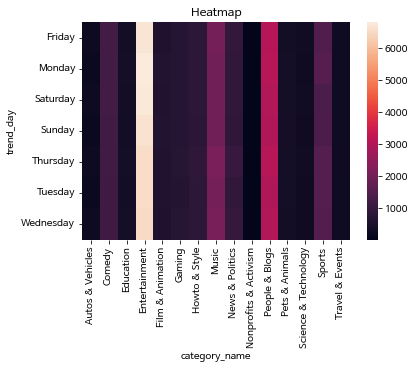

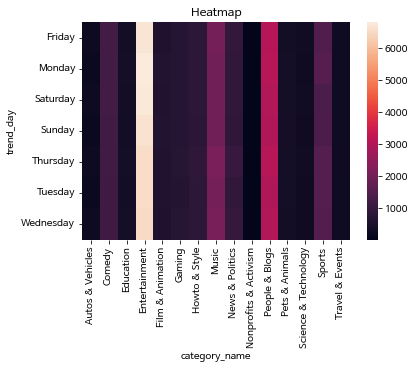

In [55]:
ax = sns.heatmap(df_new)
plt.title('Heatmap')
plt.show(0)

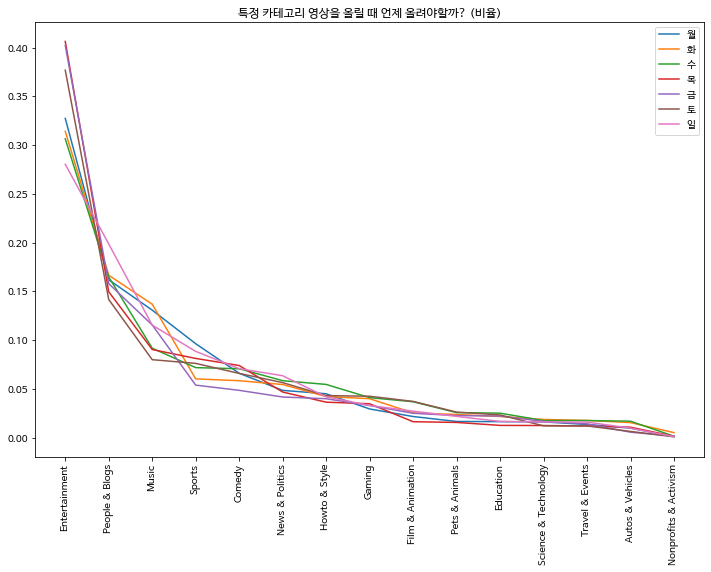

In [82]:
# 영상 올린 시점도 봐보자!

plt.figure(figsize = (12, 8))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 0')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 1')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 2')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 3')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 4')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 5')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('publishedAt.dt.dayofweek == 6')['category_name'].value_counts(normalize=True))
plt.xticks(prob_count.index, rotation = 90, fontsize = 10) 
plt.legend(['월', '화', '수', '목', '금', '토', '일'])
plt.title('특정 카테고리 영상을 올릴 때 언제 올려야할까? (비율)')
plt.show()


In [26]:
week_day = df.query('trending_date.dt.dayofweek in [0,1,2,3,4]')
week_end = df.query('trending_date.dt.dayofweek in [5,6]')

In [28]:
print("주중 카테고리별 트렌딩 영상 수")
print(week_day['category_name'].value_counts()/5)

print('-'*30)

print("주말 카테고리별 트렌딩 영상 수")
print(week_end['category_name'].value_counts()/2)

# 미세한 영상의 개수차이만 존재할 뿐 trending된 영상의 카테고리별 순위에 대해서는 전체적으로 유의미한 차이를 보이지는 않음

주중 카테고리별 트렌딩 영상 수
Entertainment            6618.4
People & Blogs           3032.0
Music                    2073.6
Sports                   1503.6
Comedy                   1195.4
News & Politics           957.4
Howto & Style             837.0
Gaming                    709.8
Film & Animation          616.6
Pets & Animals            374.0
Education                 372.6
Science & Technology      315.6
Travel & Events           281.0
Autos & Vehicles          239.0
Nonprofits & Activism      33.6
Name: category_name, dtype: float64
------------------------------
주말 카테고리별 트렌딩 영상 수
Entertainment            6677.0
People & Blogs           2974.0
Music                    1980.0
Sports                   1380.5
Comedy                   1207.0
News & Politics           892.5
Howto & Style             817.0
Gaming                    699.5
Film & Animation          642.5
Pets & Animals            389.0
Education                 354.5
Science & Technology      324.0
Travel & Events           272.5
A

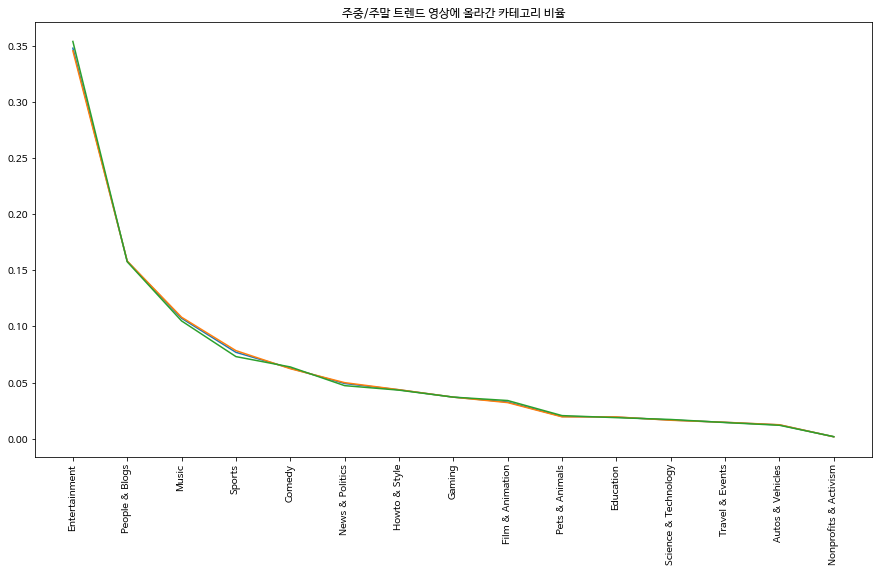

In [74]:
# 그래프 그리기

plt.figure(figsize = (15, 8))
plt.plot(prob_count.index,prob_count)
plt.plot(prob_count.index,week_day['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,week_end['category_name'].value_counts(normalize=True))
plt.xticks(prob_count.index, rotation = 90, fontsize = 10) 
plt.title('주중/주말 트렌드 영상에 올라간 카테고리 비율')
plt.show()


In [30]:
print("겨울 카테고리별 unique한 트렌딩 영상 수: ", end='')
print(df_uni.query('trending_date.dt.month in [12,1,2]')['category_name'].value_counts().sum(),"개")
print(df_uni.query('trending_date.dt.month in [12,1,2]')['category_name'].value_counts())

print('-'*30)
print("봄 카테고리별 unique한 트렌딩 영상 수: ", end='')
print(df_uni.query('trending_date.dt.month in [3,4,5]')['category_name'].value_counts().sum(),"개")
print(df_uni.query('trending_date.dt.month in [3,4,5]')['category_name'].value_counts())

print('-'*30)
print("여름 카테고리별 unique한 트렌딩 영상 수: ", end='')
print(df_uni.query('trending_date.dt.month in [6,7,8]')['category_name'].value_counts().sum(),"개")
print(df_uni.query('trending_date.dt.month in [6,7,8]')['category_name'].value_counts())

print('-'*30)
print("가을 카테고리별 unique한 트렌딩 영상 수: ", end='')
print(df_uni.query('trending_date.dt.month in [9,10,11]')['category_name'].value_counts().sum(),"개")
print(df_uni.query('trending_date.dt.month in [9,10,11]')['category_name'].value_counts())

# 미세한 영상의 개수차이만 존재할 뿐 trending된 영상의 카테고리별 순위에 대해서는 전체적으로 유의미한 차이를 보이지는 않음

겨울 카테고리별 unique한 트렌딩 영상 수: 4243 개
Entertainment            1514
People & Blogs            671
Music                     399
Sports                    353
Comedy                    269
Howto & Style             181
News & Politics           167
Gaming                    165
Film & Animation          134
Education                 111
Pets & Animals             88
Travel & Events            65
Science & Technology       62
Autos & Vehicles           51
Nonprofits & Activism      13
Name: category_name, dtype: int64
------------------------------
봄 카테고리별 unique한 트렌딩 영상 수: 4123 개
Entertainment            1514
People & Blogs            610
Music                     477
Sports                    332
Comedy                    296
News & Politics           239
Howto & Style             164
Gaming                    131
Film & Animation          107
Education                  66
Pets & Animals             58
Travel & Events            53
Autos & Vehicles           43
Science & Technology       2

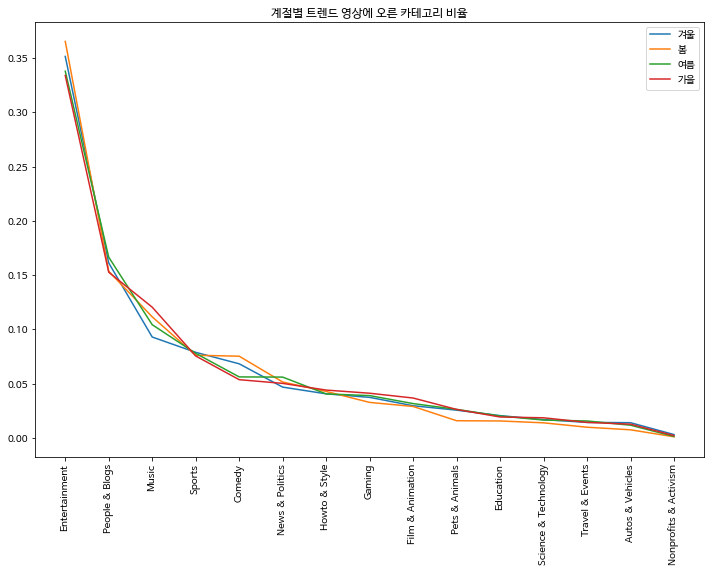

In [79]:
# 그래프 그리기
plt.figure(figsize = (12, 8))
# plt.plot(prob_count.index,prob_count)
plt.plot(prob_count.index,df.query('trending_date.dt.month in [12,1,2]')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.month in [3,4,5]')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.month in [6,7,8]')['category_name'].value_counts(normalize=True))
plt.plot(prob_count.index,df.query('trending_date.dt.month in [9,10,11]')['category_name'].value_counts(normalize=True))
plt.title('계절별 트렌드 영상에 오른 카테고리 비율')
plt.xticks(prob_count.index, rotation = 90, fontsize = 10) 
plt.legend(['겨울', '봄', '여름', '가을'])
plt.show()
